# Regression Analysis

## Contents
### 1. Importing Libraries and Data
### 2. Visual Exploration
### 3. Preparing for regression
### 4. Regression Analysis


## 1. Importing Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [8]:
# Import data
df = pd.read_pickle(os.path.join(r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/09-2024 A6 Spotify Analysis/02 Data/Prepared Data/fulldf9_27.pkl'))

## 2. Visual Exploration

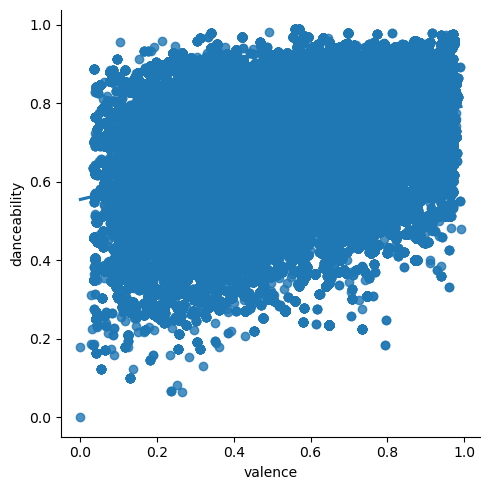

In [11]:
# Create a scatterplot for the "valence" and "danceability" columns in seaborn

sns.lmplot(x = 'valence', y = 'danceability', data = df)

### This looks like as good a correlation to explore as any. I'm really interested in the qualities of music that make for high danceability, and valence (as a measure of happiness)

## 3. Preparing for regression

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['valence'].values.reshape(-1,1)
y = df['danceability'].values.reshape(-1,1)

In [17]:
X

array([[0.535],
       [0.438],
       [0.721],
       ...,
       [0.693],
       [0.282],
       [0.422]])

In [19]:
y

array([[0.521],
       [0.747],
       [0.674],
       ...,
       [0.573],
       [0.633],
       [0.638]])

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [25]:
# Create a regression object.

regression = LinearRegression()

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

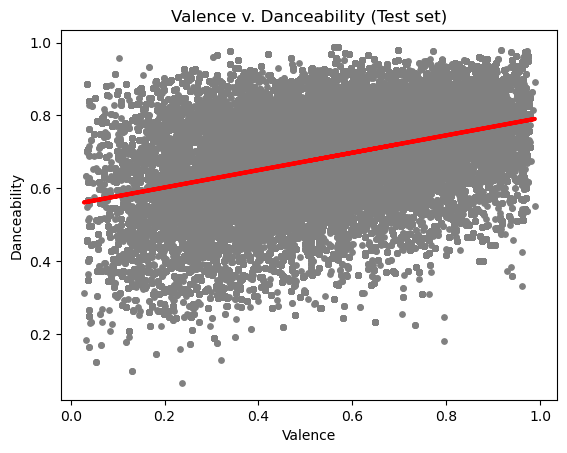

In [31]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Valence v. Danceability (Test set)')
plot_test.xlabel('Valence')
plot_test.ylabel('Danceability')
plot_test.show()

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.23818521]]
Mean squared error:  0.015832620311414865
R2 score:  0.15789827714771654


In [37]:
y_predicted

array([[0.71937038],
       [0.69293182],
       [0.7560509 ],
       ...,
       [0.68221349],
       [0.59408496],
       [0.67673523]])

In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.701,0.719370
1,0.669,0.692932
2,0.788,0.756051
3,0.682,0.733423
4,0.778,0.713654
5,0.673,0.678641
6,0.561,0.612663
7,0.884,0.665779
8,0.617,0.717465
9,0.575,0.666017


### I think it's safe to say that the relationship between valence and danceability definitely exists, but danceability cannot be predicted by valence alone. The slope of .238 shows that, in a loose sense, the two variables do increase together, but the variance is way too high for there to be a linear relationship. The R2 value of 0.158 tells us that the relationship is not strong enough to warrant a predictive model. 